In [6]:

from xlrd import open_workbook
import matplotlib.pyplot as plt 
import requests 
import pandas as pd
import numpy as np
 

In [7]:
analysis = pd.read_excel('movie_data.xlsx')
analysis.head()

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year
0,0,339403,Baby Driver,34000000,226945087,113.0,Action,Crime,tt3890160,Baby Driver,22.094,2017-06-28,WINNER,2017
1,1,425298,Darkland,0,0,112.0,Thriller,Action,tt5431082,Darkland,4.753,2017-01-19,NO,2017
2,2,419430,Get Out,4500000,255017329,104.0,Mystery,Thriller,tt5052448,Get Out,24.949,2017-02-24,WINNER,2017
3,3,428449,A Ghost Story,100000,1596371,93.0,Drama,Fantasy,tt6265828,"Ghost Story, A",7.997,2017-07-07,NO,2017
4,4,441498,In the Intense Now,0,0,127.0,Documentary,NaN,tt6532954,No Intenso Agora,1.830,2017-11-09,NO,2017


In [8]:
winners = ["The Shape Of Water",
"Moonlight",
"Spotlight"
"Birdman Or (The Unexpected Virtue Of Ignorance)",
"12 Years A Slave",
"Argo",
"The Artist",
"The King's Speech",
"The Hurt Locker",
"Slumdog Millionaire",
"No Country For Old Men",
"The Departed",
"Crash",
"Million Dollar Baby",
"The Lord Of The Rings: The Return Of The King",
"Chicago",
"A Beautiful Mind",
"Gladiator",
"American Beauty",
"Shakespeare In Love",
"Titanic",
"The English Patient",
"Braveheart",
"Forrest Gump",
"Schindler's List",
"Unforgiven",
"The Silence Of The Lambs",
"Dances With Wolves"]
winning_movies = analysis.loc[analysis["TITLE"].isin(winners), :]
winning_movies["Profit"] = winning_movies["REVENUE"] - winning_movies["BUDGET"]
winning_movies['Earning per $ spent'] = winning_movies["REVENUE"]/winning_movies["BUDGET"]
winning_movies['Earning per min'] = winning_movies["REVENUE"]/winning_movies["RUNTIME"]
winning_movies['ROI'] = ((winning_movies["REVENUE"]-winning_movies["BUDGET"])/winning_movies["BUDGET"])*100
winning_movies

/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year,Profit,Earning per $ spent,Earning per min,ROI
46,47,376867,Moonlight,4000000,65046687,111.0,Drama,NaN,tt4975722,Moonlight,11.211,2016-10-21,WINNER,2016,61046687,16.261672,5.860062e+05,1526.167175
510,522,33,Unforgiven,14000000,159157447,131.0,Western,NaN,tt0105695,Unforgiven [2013],13.780,1992-08-07,WINNER,1992,145157447,11.368389,1.214942e+06,1036.838907
539,551,68734,Argo,44500000,232324128,120.0,Drama,Thriller,tt1024648,Argo,11.326,2012-10-11,WINNER,2012,187824128,5.220767,1.936034e+06,422.076692
723,744,74643,The Artist,15000000,133432856,100.0,Drama,Comedy,tt1655442,"Artist, The",9.459,2011-06-26,WINNER,2011,118432856,8.895524,1.334329e+06,789.552373
729,750,14,American Beauty,15000000,356296601,122.0,Drama,NaN,tt0169547,Beauty,16.783,1999-09-15,WINNER,1999,341296601,23.753107,2.920464e+06,2275.310673
997,1028,45269,The King's Speech,15000000,414211549,118.0,Drama,History,tt1504320,"King's Speech, The",11.856,2010-09-06,WINNER,2010,399211549,27.614103,3.510267e+06,2661.410327
1433,1490,12162,The Hurt Locker,15000000,42000000,131.0,Drama,Thriller,tt0887912,"Hurt Locker, The",12.377,2008-10-10,WINNER,2008,27000000,2.800000,3.206107e+05,180.000000
1541,1601,12405,Slumdog Millionaire,15000000,377910544,120.0,Drama,Romance,tt1010048,Slumdog Millionaire,12.473,2008-05-12,WINNER,2008,362910544,25.194036,3.149255e+06,2419.403627
1911,1984,1422,The Departed,90000000,289847354,151.0,Drama,Thriller,tt0407887,"Departed, The",20.750,2006-10-05,WINNER,2006,199847354,3.220526,1.919519e+06,222.052616
2427,2517,1640,Crash,6500000,98410061,112.0,Drama,NaN,tt0375679,Crash [2004],11.197,2005-05-06,WINNER,2005,91910061,15.140009,8.786613e+05,1414.000938


In [13]:

# oscar_df = winning_movies.sort_values('Year')
# Rev = winning_movies['REVENUE'].unique()
# oscar_data = pd.DataFrame({'Rev': Rev})
# oscar_data.reset_index(inplace = True)

# oscar_df

# revenue = oscar_df['Profit']
# x_axis = oscar_df["Year"]
# plt.plot(x_axis, revenue, color="b")







<IPython.core.display.Javascript object>


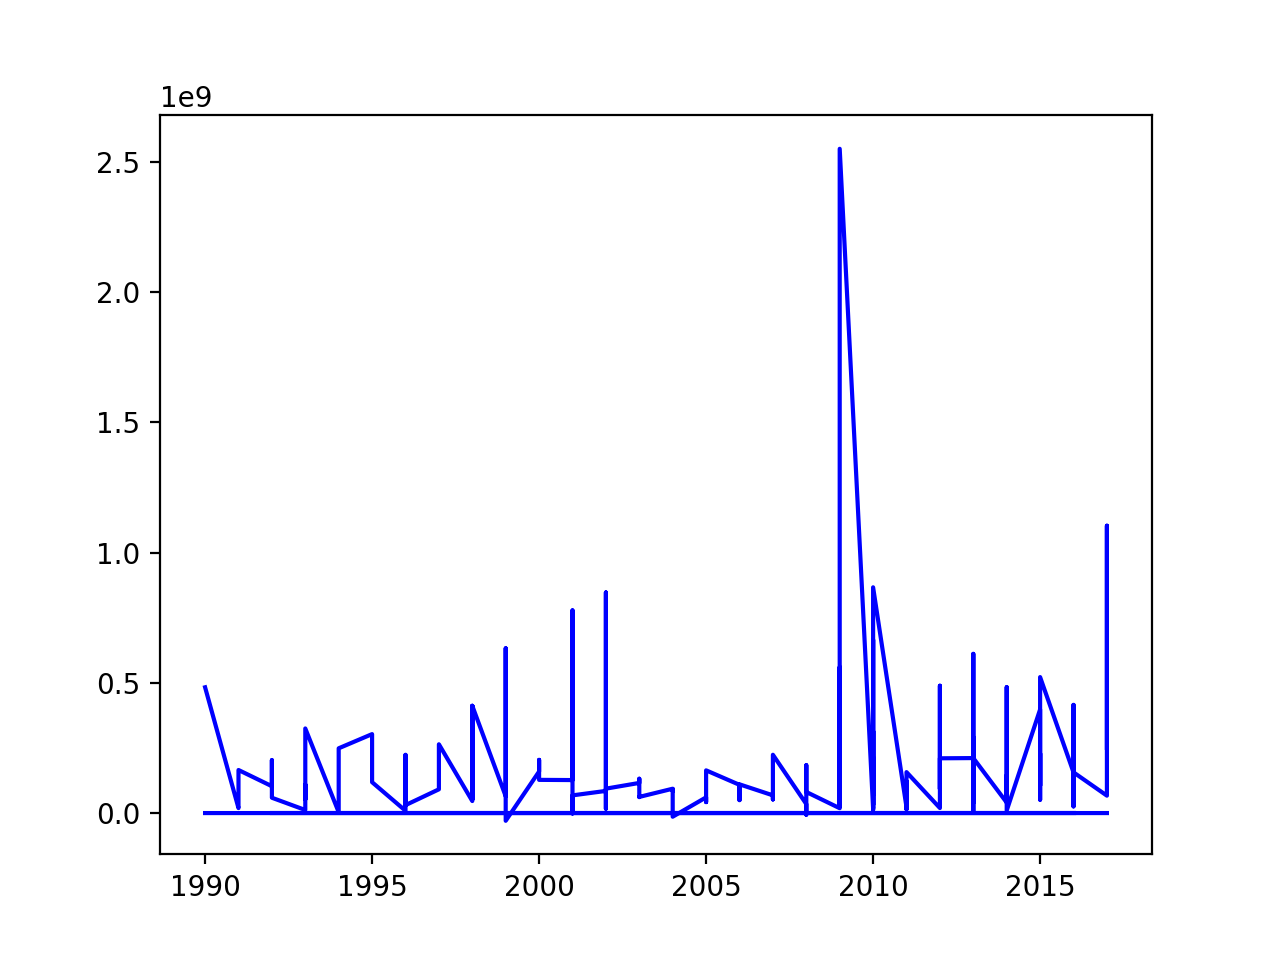

In [14]:
# Earning_per_dollar = oscar_df['Earning per $ spent']
# x_axis = oscar_df["Year"]
# plt.plot(x_axis, Earning_per_dollar, color="b")

# plt.show()

In [11]:
# ROI = oscar_df['ROI']
# x_axis = oscar_df["Year"]
# plt.plot(x_axis, ROI, color="b")

# plt.show()

In [12]:
# Earning_per_min = oscar_df['Earning per min']
# x_axis = oscar_df["Year"]
# plt.scatter (x_axis, Earning_per_min,marker="o", facecolors="r", edgecolors="b")
# plt.show()

In [15]:
nominees = ["Awakenings" ,  
"Ghost" ,  
"The Godfather Part III" , 
"Goodfellas" , 
"Beauty and the Beast" , 
"Bugsy" , 
"JFK" , 
"The Prince of Tides" , 
"The Crying Game" , 
"A Few Good Men" , 
"Howards End" , 
"Scent of a Woman" , 
"The Fugitive" , 
"In the Name of the Father" , 
"The Piano" , 
"The Remains of the Day" , 
"Four Weddings and a Funeral" , 
"Pulp Fiction" , 
"Quiz Show" , 
"The Shawshank Redemption" , 
"Apollo 13" , 
"Babe" , 
"The Postman (Il Postino)" ,
"Sense and Sensibility" , 
"Fargo" , 
"Jerry Maguire" , 
"Secrets & Lies" , 
"Shine" , 
"As Good as It Gets" ,
"The Full Monty" , 
"Good Will Hunting" , 
"L.A. Confidential" , 
"Elizabeth" , 
"Life Is Beautiful" , 
"Saving Private Ryan" , 
"The Thin Red Line" , 
"The Cider House Rules" , 
"The Green Mile" , 
"The Insider" , 
"The Sixth Sense" , 
"Chocolat" ,
"Crouching Tiger, Hidden Dragon" , 
"Erin Brockovich" , 
"Traffic" , 
"Gosford Park" , 
"In the Bedroom" , 
"The Lord of the Rings: The Fellowship of the Ring" , 
"Moulin Rouge!" , 
"Gangs of New York" ,
"The Hours" , 
"The Lord of the Rings: The Two Towers" , 
"The Pianist" ,
"Lost in Translation" ,
"Master and Commander: The Far Side of the World" ,
"Mystic River" , 
"Seabiscuit" , 
"The Aviator" ,
"Finding Neverland" , 
"Ray" , 
"Sideways" , 
"Brokeback Mountain" , 
"Capote" , 
"Good Night, and Good Luck" , 
"Munich" , 
"Babel" , 
"Letters from Iwo Jima" , 
"Little Miss Sunshine" , 
"The Queen" , 
"Atonement" , 
"Juno" , 
"Michael Clayton" , 
"There Will Be Blood" , 
"The Curious Case of Benjamin Button" , 
"Frost/Nixon" , 
"Milk" , 
"The Reader" , 
"Avatar" , 
"The Blind Side" , 
"District 9" , 
"An Education" , 
"Inglourious Basterds" , 
"Precious: Based on the Novel 'Push' by Sapphire" , 
"A Serious Man" , 
"Up" ,
"Up in the Air" , 
"127 Hours" , 
"Black Swan" , 
"The Fighter" , 
"Inception" , 
"The Kids Are All Right" , 
"The Social Network" , 
"Toy Story 3" , 
"True Grit" , 
"Winter's Bone" , 
"The Descendants" , 
"Extremely Loud & Incredibly Close" , 
"The Help" , 
"Hugo" ,
"Midnight in Paris" , 
"Moneyball" ,
"The Tree of Life" , 
"War Horse" , 
"Amour" , 
"Beasts of the Southern Wild" , 
"Django Unchained" , 
"Les Mis√©rables" , 
"Life of Pi" , 
"Lincoln" ,
"Silver Linings Playbook" , 
"Zero Dark Thirty" , 
"American Hustle" , 
"Captain Phillips" , 
"Dallas Buyers Club" ,
"Gravity" , 
"Her" , 
"Nebraska" ,
"Philomena" , 
"The Wolf of Wall Street" , 
"American Sniper" , 
"Boyhood" , 
"The Grand Budapest Hotel" , 
"The Imitation Game" ,
"Selma" , 
"The Theory of Everything" , 
"Whiplash" , 
"The Big Short" , 
"Bridge of Spies" , 
"Brooklyn" , 
"Mad Max: Fury Road" , 
"The Martian" , 
"The Revenant" , 
"Room" , 
"Arrival" , 
"Fences" , 
"Hacksaw Ridge" , 
"Hell or High Water" , 
"Hidden Figures" , 
"La La Land" , 
"Lion" , 
"Manchester by the Sea" , 
"Call Me by Your Name" , 
"Darkest Hour" , 
"Dunkirk" , 
"Get Out" , 
"Lady Bird" , 
"Phantom Thread" , 
"The Post" , "Three Billboards Outside Ebbing, Missouri"]


In [16]:
nominee_movies = analysis.loc[analysis["TITLE"].isin(nominees), :]
nominee_movies["Profit"] = nominee_movies["REVENUE"] - nominee_movies["BUDGET"]
nominee_movies['Earning per $ spent'] = nominee_movies["REVENUE"]/nominee_movies["BUDGET"]
nominee_movies['Earning per min'] = nominee_movies["REVENUE"]/nominee_movies["RUNTIME"]
nominee_movies['ROI'] = ((nominee_movies["REVENUE"]-nominee_movies["BUDGET"])/nominee_movies["BUDGET"])*100
nominee_movies = nominee_movies[nominee_movies.BUDGET != 0]
nominee_movies

/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year,Profit,Earning per $ spent,Earning per min,ROI
2,2,419430,Get Out,4500000,255017329,104.0,Mystery,Thriller,tt5052448,Get Out,24.949,2017-02-24,WINNER,2017,250517329,56.670518,2.452090e+06,5567.051756
11,11,329865,Arrival,47000000,203388186,116.0,Thriller,Drama,tt2543164,Arrival,21.696,2016-11-10,WINNER,2016,156388186,4.327408,1.753346e+06,332.740821
22,23,393457,Fences,24000000,64414761,139.0,Drama,NaN,tt2671706,Fences,8.321,2016-12-16,WINNER,2016,40414761,2.683948,4.634155e+05,168.394837
28,29,324786,Hacksaw Ridge,40000000,175302354,140.0,Drama,History,tt2119532,Hacksaw Ridge,21.076,2016-10-07,WINNER,2016,135302354,4.382559,1.252160e+06,338.255885
31,32,338766,Hell or High Water,12000000,37589296,102.0,Crime,Drama,tt2582782,Hell or High Water,7.221,2016-08-12,WINNER,2016,25589296,3.132441,3.685225e+05,213.244133
39,40,313369,La La Land,30000000,445435700,129.0,Comedy,Drama,tt3783958,La La Land,19.253,2016-11-29,WINNER,2016,415435700,14.847857,3.452990e+06,1384.785667
43,44,334541,Manchester by the Sea,9000000,75026965,135.0,Drama,NaN,tt4034228,Manchester by the Sea,11.482,2016-11-18,WINNER,2016,66026965,8.336329,5.557553e+05,733.632944
86,88,318846,The Big Short,28000000,133346506,131.0,Comedy,Drama,tt1596363,"Big Short, The",9.568,2015-12-11,WINNER,2015,105346506,4.762375,1.017912e+06,376.237521
89,91,296098,Bridge of Spies,40000000,165478348,141.0,Thriller,Drama,tt3682448,Bridge of Spies,14.308,2015-10-15,WINNER,2015,125478348,4.136959,1.173605e+06,313.695870
91,93,167073,Brooklyn,11000000,62076141,111.0,Drama,Romance,tt2381111,Brooklyn,8.096,2015-10-20,WINNER,2015,51076141,5.643286,5.592445e+05,464.328555


In [17]:
roi_year = nominee_movies.groupby('Year')
avg_roi = roi_year['ROI'].mean()
roi_data = pd.DataFrame({'Avg ROI': avg_roi})
roi_data.reset_index(inplace = True)
plt.plot(roi_data['Year'], roi_data['Avg ROI'],color = 'b')
plt.show()

In [18]:
oscar_df2 = nominee_movies.sort_values('Year')
Rev2 = nominee_movies['REVENUE'].unique()
oscar_data2 = pd.DataFrame({'Rev': Rev})
oscar_data2.reset_index(inplace = True)

oscar_df2

revenue = oscar_df2['Profit']
x_axis2 = oscar_df2["Year"]
plt.plot(x_axis2, revenue, color="b")

plt.show()

In [ ]:
Earning_per_dollar = oscar_df2['Earning per $ spent']
x_axis2 = oscar_df2["Year"]
plt.plot(x_axis2, Earning_per_dollar, color="b")

plt.show()

In [ ]:
ROI2 = oscar_df2['ROI']
x_axis = oscar_df2["Year"]
plt.plot(x_axis, ROI2, color="b")

plt.show()

In [ ]:
Earning_per_min2 = oscar_df2['Earning per min']
x_axis = oscar_df2["Year"]
plt.scatter (x_axis, Earning_per_min2,marker="o", facecolors="r", edgecolors="b")
plt.show()